In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

# Express
Help, there’s a cricket on my floor! I want to trap it with a cup so that I can safely move it outside. But every time I get close, it hops exactly 1 foot in a random direction.

I take note of its starting position and come closer. Boom — it hops in a random direction. I get close again. Boom — it takes another hop in a random direction, independent of the direction of the first hop.

What is the most probable distance between the cricket’s current position after two random jumps and its starting position? (Note: This puzzle is not asking for the expected distance, but rather the most probable distance. In other words, if you consider the probability distribution over all possible distances, where is the peak of this distribution?)

In [7]:
d=[]

for d1 in range(0, 360):
    r1=math.radians(d1)
    for d2 in range(0, 360):
        r2=math.radians(d2)
        d.append((r1, r2))
        
df=pd.DataFrame(d, columns=("r1", "r2"))
df

,r1,r2
0,0.000000,0.000000
1,0.000000,0.017453
2,0.000000,0.034907
3,0.000000,0.052360
4,0.000000,0.069813
...,...,...
129595,6.265732,6.195919
129596,6.265732,6.213372
129597,6.265732,6.230825
129598,6.265732,6.248279


In [17]:
df['dis']=np.sqrt(np.square(np.cos(df['r1'])+np.cos(df['r2'])) + np.square(np.sin(df['r1'])+np.sin(df['r2'])))

In [35]:
df[0:10]

,r1,r2,dis
0,0.0,0.000000,2.000000
1,0.0,0.017453,1.999924
2,0.0,0.034907,1.999695
3,0.0,0.052360,1.999315
4,0.0,0.069813,1.998782
5,0.0,0.087266,1.998096
6,0.0,0.104720,1.997259
7,0.0,0.122173,1.996270
8,0.0,0.139626,1.995128
9,0.0,0.157080,1.993835


In [20]:
sns.__version__

'0.11.1'

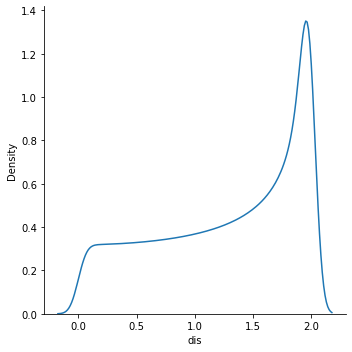

In [23]:
sns.displot(df['dis'], kind='kde')

In [34]:
df2 = pd.DataFrame(data={"d": np.arange(0, 360, 0.1)})
df2['r'] = df2['d'].apply(math.radians)
df2['dist'] = np.sqrt(np.square(np.cos(df2['r'])+1)+np.square(np.sin(df2['r'])))
df2[0:10]

,d,r,dist
0,0.0,0.000000,2.000000
1,0.1,0.001745,1.999999
2,0.2,0.003491,1.999997
3,0.3,0.005236,1.999993
4,0.4,0.006981,1.999988
5,0.5,0.008727,1.999981
6,0.6,0.010472,1.999973
7,0.7,0.012217,1.999963
8,0.8,0.013963,1.999951
9,0.9,0.015708,1.999938


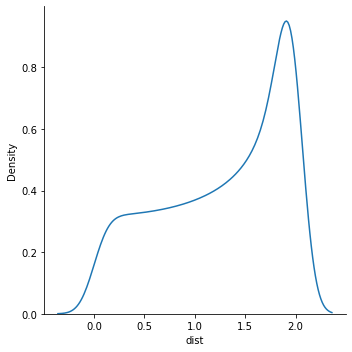

In [33]:
sns.displot(df2['dist'], kind='kde')

Define a random variable $X$ with the angle of the second hop, which is defined by:

$X \sim \mathrm{Uniform}(0,2\pi)$

pdf: $f_X(x) = \frac{1}{2\pi}$

cdf: $F_X(x) = P(X \leq x) = \frac{x}{2\pi}$ on $[0, 2\pi]$

Then the distance from the start of the first hop to the end of the second is given by:

$Y = \sqrt{(\cos{X}+1)^2 + (\sin{X})^2} = \sqrt{2\cos{X}+ 2}$

The range is $[0, 2]$. To calculate the cdf:

$F_Y(y) = P(Y \leq y) = P(\sqrt{2\cos{X} + 2} \leq y)$

$F_Y(y) = P(2\cos{X} + 2 \leq y^2) = P(X \geq \arccos{(\frac{y^2}{2} - 1)})$

$F_Y(y) = P(X \leq \pi - \arccos{(\frac{Y^2}{2} - 1)})$

$F_Y(y) = 1 - \frac{\arccos{(\frac{y^2}{2} - 1)}}{2\pi}$

Then differentiate to get the pdf:

$f_Y(y) = \frac{1}{2\pi} \frac{y}{\sqrt{1 - (\frac{y^2}{2} - 1)^2}}$

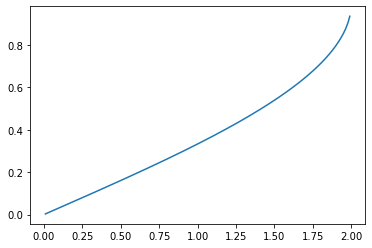

In [49]:
yt=pd.DataFrame({'y': np.arange(0.01, 2, 0.01)})
yt['cdf']=yt['y'].apply(lambda y: (2* math.pi - 2 * math.acos((y*y)/2 - 1)) / 2 / math.pi)
yt['pdf']=yt['y'].apply(lambda y: y / math.sqrt(1 - ((y*y)/2 - 1)**2) / (math.pi))
plt.plot(yt['y'], yt['cdf'])
#plt.plot(yt['y'], yt['pdf'])